<a href="https://colab.research.google.com/github/PhelaPoscam/FRFI_GOP27/blob/main/GOP27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pyreadstat
#!pip install plot-likert
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
lista = ["Parties", 
         "Observer States", 
         "UN Secretariat Observers", 
         "UN Specialised", 
         "IGO Observers", 
         "NGO Observers", 
         "Media"]
df = pd.DataFrame(columns=[lista])
df.loc[len(df.index)] = [16118, 0, 502, 465, 1303, 11711, 3350]
df = df.transpose()
df = df.reset_index()
df.columns = ['People', 'Number']
df

,People,Number
0,Parties,16118
1,Observer States,0
2,UN Secretariat Observers,502
3,UN Specialised,465
4,IGO Observers,1303
5,NGO Observers,11711
6,Media,3350


In [ ]:
df = df.drop(1)
df

,People,Number,Porcentage,Y,X
0,Parties,16118,48.19,1,0
2,UN Secretariat Observers,502,1.50,1,2
3,UN Specialised,465,1.39,1,3
4,IGO Observers,1303,3.90,1,4
5,NGO Observers,11711,35.01,1,5
6,Media,3350,10.02,1,6


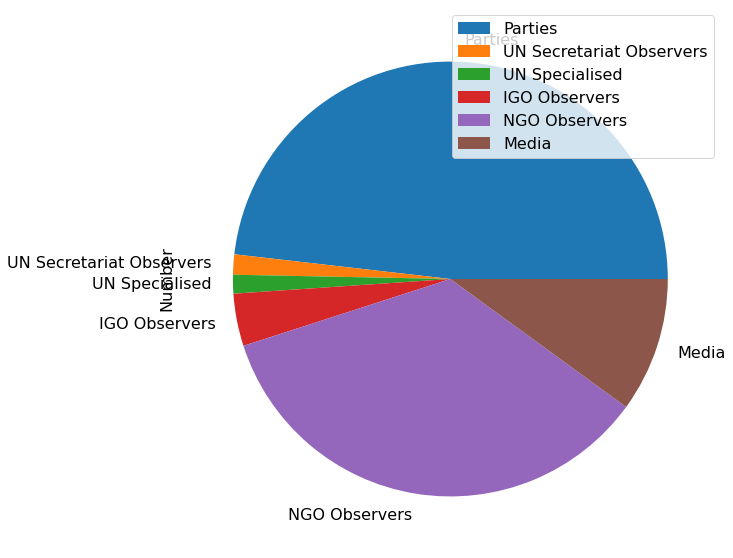

In [ ]:
plot = df.plot.pie(y='Number', labels = df.People, figsize=(10, 10))

In [ ]:
df['Porcentage'] = (df.Number / df.Number.sum())*100
df

,People,Number,Porcentage,Y,X
0,Parties,16118,48.186792,1,0
2,UN Secretariat Observers,502,1.500792,1,2
3,UN Specialised,465,1.390176,1,3
4,IGO Observers,1303,3.895483,1,4
5,NGO Observers,11711,35.011510,1,5
6,Media,3350,10.015247,1,6


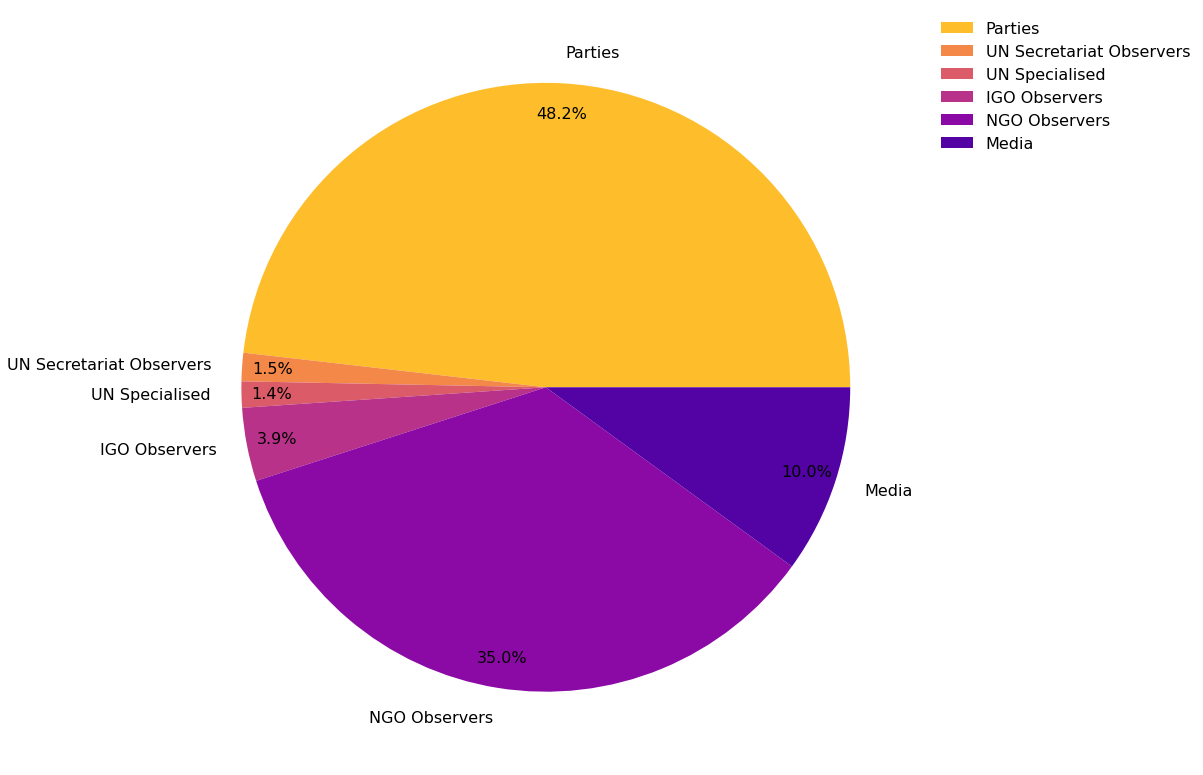

In [ ]:
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(df.index)).as_hex())
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 16})
plt.pie(df.Number,
        labels= df.People,
        colors=pal_, autopct='%1.1f%%',
        pctdistance=0.9)
plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
plt.show()

In [ ]:
df["Number"] = pd.to_numeric(df["Number"])
df["Porcentage"] = pd.to_numeric(df["Porcentage"])
df.Porcentage = df.Porcentage.round(2)
df

,People,Number,Porcentage,Y,X
0,Parties,16118,48.19,1,0
2,UN Secretariat Observers,502,1.50,1,2
3,UN Specialised,465,1.39,1,3
4,IGO Observers,1303,3.90,1,4
5,NGO Observers,11711,35.01,1,5
6,Media,3350,10.02,1,6


In [ ]:
df['Y'] = [1]*len(df)
list_x = list(range(0,len(df)))
df['X'] = list_x
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(df.People,
                                                            df.Number,
                                                            df.Porcentage)]
import plotly.express as px
fig = px.scatter(df, x='X', y='Y',
                 color='People', color_discrete_sequence=pal_,
                 size='Number', text=label, size_max=90
                )
fig.update_layout(width=900, height=320,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

In [ ]:
!pip install circlify
import circlify
circles = circlify.circlify(df['Number'].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


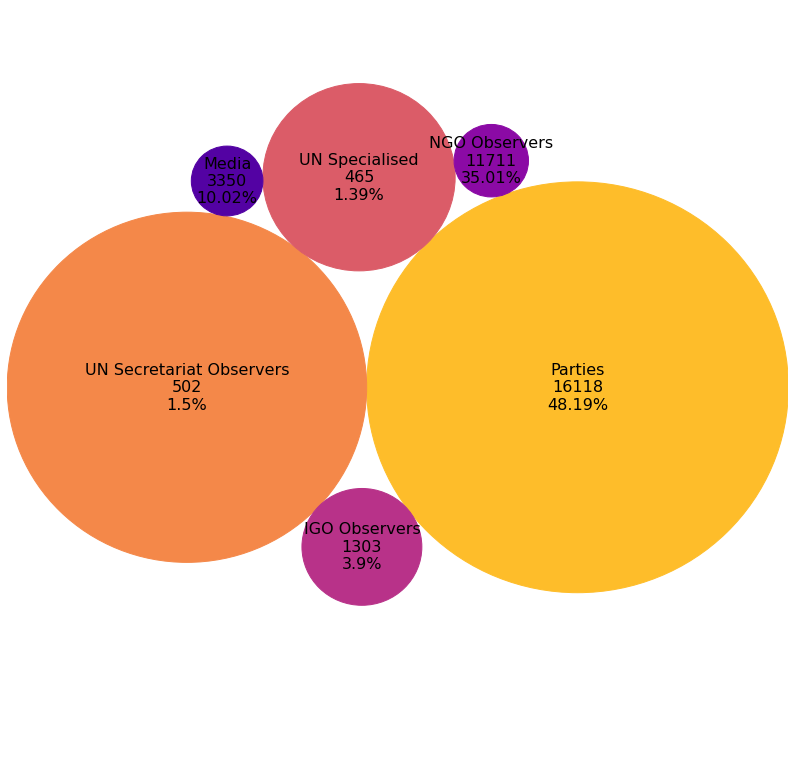

In [ ]:
#create a laebls list for each bubble 
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(df.People,
                                                            df.Number,
                                                            df.Porcentage)]
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, note, color in zip(circles, label, pal_):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
    plt.annotate(note.replace('<br>','\n'), (x,y), size=16, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, values='Number', names='People',
             color_discrete_sequence=pal_)
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.update_traces(textfont_size=16)
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, values='Number', names='People',
             color_discrete_sequence=pal_)
fig.update_traces(textposition='outside', textinfo='percent+label', 
                  hole=.6, hoverinfo="label+percent+name")
fig.update_layout(width = 800, height = 600,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
Label_per = [str(round(i*100/sum(df.Number),1))+' %' for i in df.Number]

import plotly.express as px
fig = px.treemap(df, path=[px.Constant('2022'), 'People'],
                 values=df.Porcentage,
                 color=df.People,
                 hover_name=Label_per,
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), showlegend=True)
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


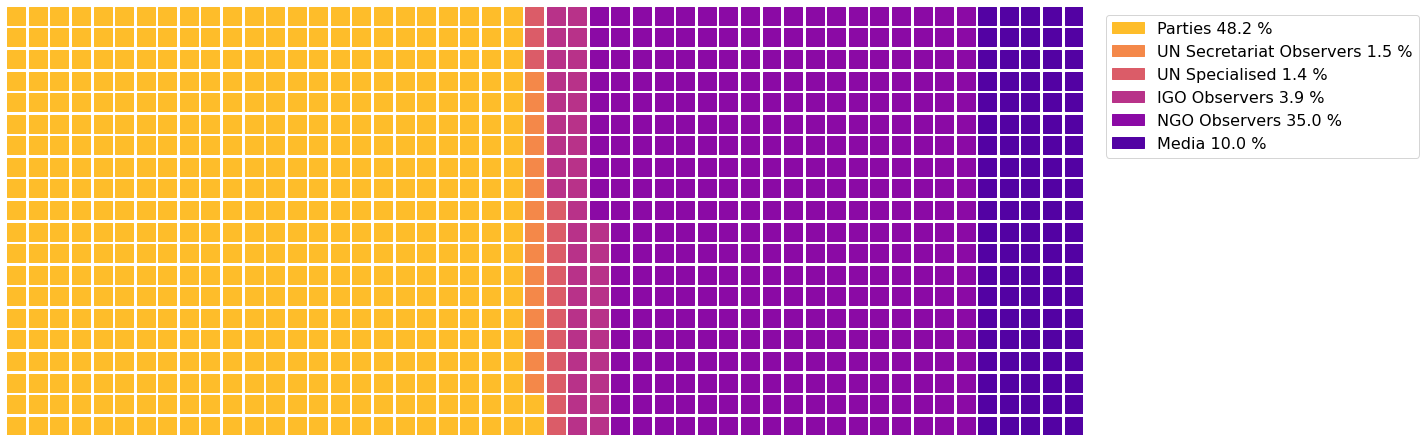

In [ ]:
!pip install pywaffle
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, 
                 rows=20, columns=50,
                 values=df.Porcentage, 
                 colors=pal_,
                 labels=[i+' '+j for i,j in zip(df.People, Label_per)],
                 figsize = (20,10),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),
                        })
plt.tight_layout()
plt.show()

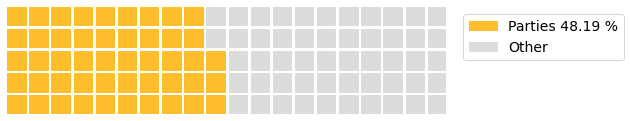

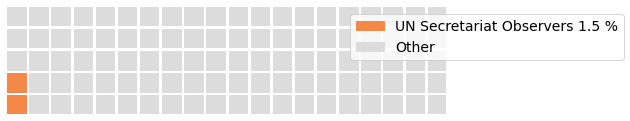

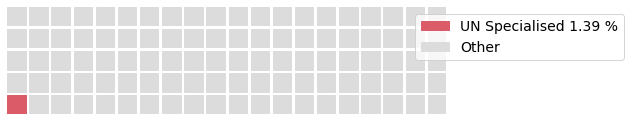

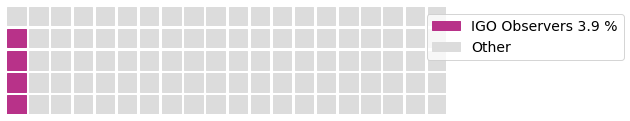

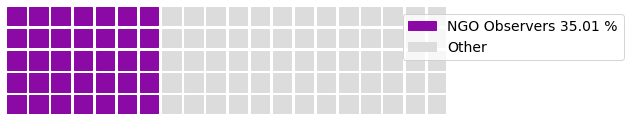

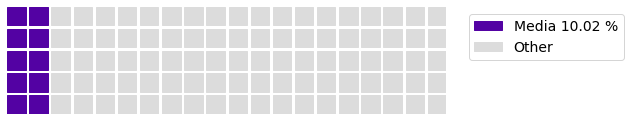

In [ ]:
keep_sname = []
plt.rcParams['savefig.facecolor']='white'
for per, people, color in zip(df.Porcentage, df.People, pal_):
    fig = plt.figure(FigureClass=Waffle,
                     rows=5, columns=20,
                     values=[per, 100 - float(per)], 
                     colors=[color,'gainsboro'],
                     labels=[people + ' ' + str(per) +' %','Other'],
                     figsize = (9,9),
                     legend={'loc':'upper right', 'bbox_to_anchor': (1.42, 1), 'fontsize':14}
                    )
    keep_sname.append('waffle_2020_'+ people + '.png')
    plt.tight_layout()
    plt.savefig('waffle_2020_'+ people + '.png', bbox_inches='tight')   #export_fig
    plt.show()